# **嵌入法**

嵌入法是一种让算法自己决定使用哪些特征的方法，即特征选择和算法训练同时进行。在使用嵌入法时，我们先使用某些机器学习的算法和模型进行训练，得到各个特征的权值系数，根据权值系数从大到小选择特征。这些权值系数往往代表了特征对于模型的某种贡献或某种重要性，比如决策树和树的集成模型中的feature_importances_属性，可以列出各个特征对树的建立的贡献，我们就可以基于这种贡献的评估，找出对模型建立最有用的特征。因此相比于过滤法，嵌入法的结果会更加精确到模型的效用本身，对于提高模型效力有更好的效果。并且，由于考虑特征对模型的贡献，因此无关的特征（需要相关性过滤的特征）和无区分度的特征（需要方差过滤的特征）都会因为
缺乏对模型的贡献而被删除掉，可谓是过滤法的进化版。


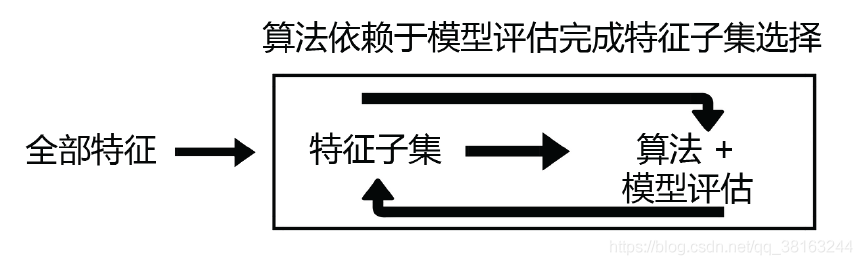

过滤法中使用的统计量可以使用统计知识和常识来查找范围（如p值应当低于显著性水平0.05），而嵌入法中使用的权值系数却没有这样的范围可找——我们可以说，权值系数为0的特征对模型丝毫没有作用，但当大量特征都对模型有贡献且贡献不一时，我们就很难去界定一个有效的临界值。这种情况下，模型权值系数就是我们的超参数，我们或许需要学习曲线，或者根据模型本身的某些性质去判断这个超参数的最佳值究竟应该是多少。在我们之后的学习当中，每次讲解新的算法，我都会为大家提到这个算法中的特征工程是如何处理，包括具体到每个算法的嵌入法如何使用。在这堂课中，我们会为大家讲解随机森林和决策树模型的嵌入法。

另外，嵌入法引入了算法来挑选特征，因此其计算速度也会和应用的算法有很大的关系。如果采用计算量很大，计算缓慢的算法，嵌入法本身也会非常耗时耗力。并且，在选择完毕之后，我们还是需要自己来评估模型。


* eature_selection.SelectFromModel    

> class sklearn.feature_selection.SelectFromModel (estimator, threshold=None, prefit=False, norm_order=1,
max_features=None)

SelectFromModel是一个元变换器，可以与任何在拟合后具有coef_，feature_importances_属性或参数中可选惩罚项的评估器一起使用（比如随机森林和树模型就具有属性feature_importances_，逻辑回归就带有l1和l2惩罚项，线性支持向量机也支持l2惩罚项）。

对于有feature_importances_的模型来说，若重要性低于提供的阈值参数，则认为这些特征不重要并被移除。feature_importances_的取值范围是[0,1]，如果设置阈值很小，比如0.001，就可以删除那些对标签预测完全没贡献的特征。如果设置得很接近1，可能只有一两个特征能够被留下。


* 使用惩罚项的模型的嵌入法    

而对于使用惩罚项的模型来说，正则化惩罚项越大，特征在模型中对应的系数就会越小。当正则化惩罚项大到一定的程度的时候，部分特征系数会变成0，当正则化惩罚项继续增大到一定程度时，所有的特征系数都会趋于0。 但是我们会发现一部分特征系数会更容易先变成0，这部分系数就是可以筛掉的。也就是说，我们选择特征系数较大的特征。另外，支持向量机和逻辑回归使用参数C来控制返回的特征矩阵的稀疏性，参数C越小，返回的特征越少。Lasso回归，用alpha参数来控制返回的特征矩阵，alpha的值越大，返回的特征越少。


* 参数说明  

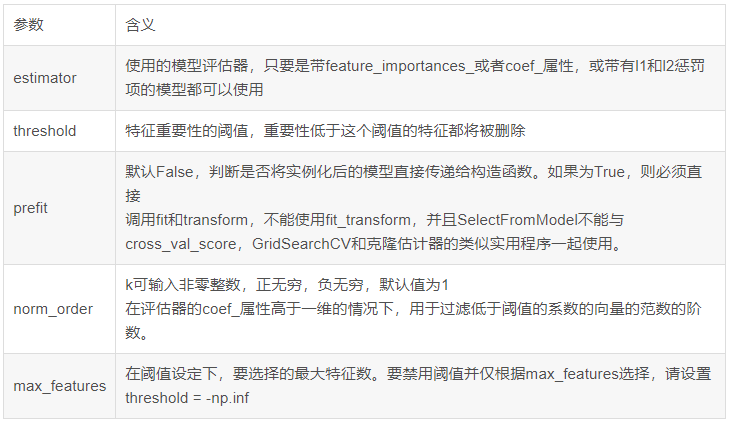  
我们重点要考虑的是前两个参数。在这里，我们使用随机森林为例，则需要学习曲线来帮助我们寻找最佳特征值。

In [2]:
# 嵌入法：embedded
# 嵌入法在随机森林和决策树中的使用
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as RFC

In [3]:
# 实例化随机森林
RFC_=RFC(n_estimators=100,random_state=0)

In [4]:
import pandas as pd
data=pd.read_csv(r"C:\workspace\Data\digit recognizor.csv")
import numpy as np
x=data.iloc[:,1:]
y=data.iloc[:,0]

In [5]:
# 实例化嵌入法的模型
# 第二个参数是阈值，小于此阈值的特征全都会被砍掉
# 此处的x数据集没有被过滤
# 这里的阈值一般都是在0-1之间
x_embedded=SelectFromModel(RFC_,threshold=0.005).fit_transform(x,y)
x_embedded.shape

(42000, 36)

In [6]:
# 选择出42个特征，模型的维度明显降低
# 查看训练好的模型特征的重要性
 
RFC_.fit(x,y).feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.03943216e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 5.21709087e-07, 4.96726660e-07, 5.10209197e-07,
       5.13114713e-07, 5.20152289e-06, 5.24415679e-07, 2.98760440e-06,
       5.34207572e-06, 3.09554511e-06, 3.46358017e-06, 3.46242114e-06,
       9.78782287e-07, 1.99320911e-06, 4.77821003e-07, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 5.09114204e-07, 5.26310437e-07,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [7]:
# 模型的维度明显被降低了
# 同样也可以画学习曲线来找最佳阈值
import numpy as np
import matplotlib.pyplot as plt
(RFC_.fit(x,y).feature_importances_).max()

0.010150603137186043

In [ ]:
threshold=np.linspace(0,RFC_.fit(x,y).feature_importances_.max(),30)
 
# for i in range(RFC_.fit(x,y).feature_importances_)但是range()函数包含第一个数，不包含第二个数
# 并且第三个参数是步长，我们很难界定步长多少，所以我们使用linspace()函数，第一个参数是开头，第二个
# 是结尾，第三个参数是选取的数据个数，所以说此参数是用来选取在最大值和最小值之间选取有限个数
# 的时候来使用的
scores=[]
for i in np.linspace(0,RFC_.fit(x,y).feature_importances_.max(),30):
    x_embedded=SelectFromModel(RFC_,threshold=i).fit_transform(x,y)
    score=cross_val_score(RFC_,x_embedded,y,cv=5).mean()
    scores.append(score)
plt.plot(np.linspace(0,RFC_.fit(x,y).feature_importances_.max(),30),scores)
plt.show()

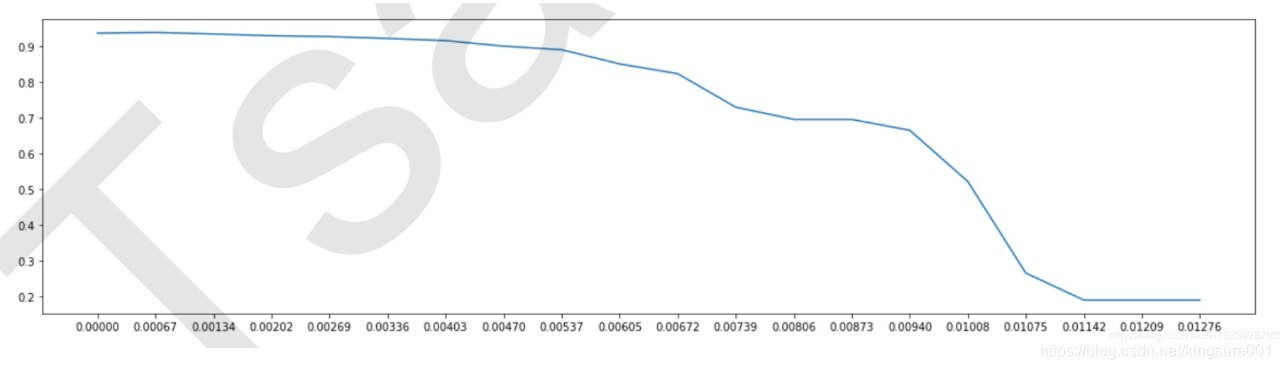

从图像上来看，随着阈值越来越高，模型的效果逐渐变差，被删除的特征越来越多，信息损失也逐渐变大。但是在0.00134之前，模型的效果都可以维持在0.93以上，因此我们可以从中挑选一个数值来验证一下模型的效果。我们可以进一步细化学习曲线，找出k值。在嵌入法下，我们很容易就能够实现特征选择的目标：减少计算量，提升模型表现。因此，比起要思考很多统计量的过滤法来说，嵌入法可能是更有效的一种方法。然而，在算法本身很复杂的时候，过滤法的计算远远比嵌入法要快，所以大型数据中，我们还是会优先考虑过滤法。
